Epoch 1/100
800/800 [==============================] - 4s 5ms/step - loss: 1.8270 - accuracy: 0.3137 - val_loss: 1.5797 - val_accuracy: 0.4346
Epoch 2/100
800/800 [==============================] - 4s 5ms/step - loss: 1.5270 - accuracy: 0.4394 - val_loss: 1.4078 - val_accuracy: 0.4973
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 1.4290 - accuracy: 0.4790 - val_loss: 1.3278 - val_accuracy: 0.5320
Epoch 4/100
800/800 [==============================] - 4s 4ms/step - loss: 1.3660 - accuracy: 0.5038 - val_loss: 1.2673 - val_accuracy: 0.5517
Epoch 5/100
800/800 [==============================] - 4s 4ms/step - loss: 1.3143 - accuracy: 0.5265 - val_loss: 1.1946 - val_accuracy: 0.5688
Epoch 6/100
800/800 [==============================] - 4s 5ms/step - loss: 1.2780 - accuracy: 0.5387 - val_loss: 1.2166 - val_accuracy: 0.5678
Epoch 7/100
800/800 [==============================] - 4s 5ms/step - loss: 1.2511 - accuracy: 0.5495 - val_loss: 1.1229 - val_accuracy: 0.6183

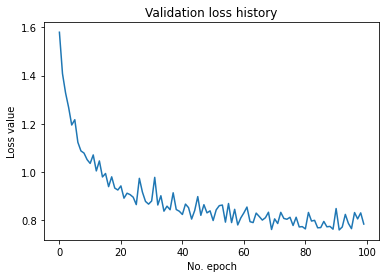

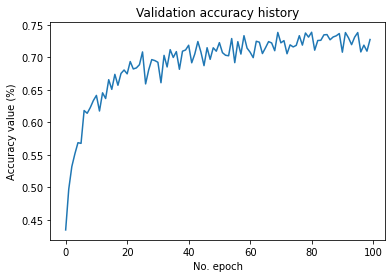

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
print("Training is done!")
model.save('model_dropout_aug_100.h5')
print("Model is successfully stored!")

Training is done!
Model is successfully stored!
